In [149]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [150]:
def xy_a_s(x, y, L):
    return y * L + x

def s_a_xy(s, L):
    return s % L, s // L

def vecino(s, j, L, empty):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L, N, empty):
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L, empty)
    return nn

In [151]:
def HLA(L, N, nn, empty):
    site = np.zeros(N, dtype=np.short)
    
    xseed, yseed = L // 2, L // 2
    sseed = xy_a_s(xseed, yseed, L)
    site[sseed] = 1  
    
    per = [nn[sseed, j] for j in range(4) if nn[sseed, j] != empty]
    valPer = [np.random.random() for _ in per]
    
    sorted_indices = np.argsort(valPer)
    per = np.array(per)[sorted_indices]
    valPer = np.array(valPer)[sorted_indices]
    
    sstart = per[0]
    site[sstart] = 1
    cluster = [sstart]
    per = np.delete(per, 0)
    valPer = np.delete(valPer, 0)

    while len(per) > 0 and not np.any([s % L == 0 or s % L == L-1 or s // L == 0 or s // L == L-1 for s in cluster]):
        snew = per[0]
        per = np.delete(per, 0)
        valPer = np.delete(valPer, 0)
        
        site[snew] = 1  
        cluster.append(snew)
        for j in range(4):
            sper = nn[snew, j]
            if sper != empty and site[sper] == 0:
                per = np.append(per, sper)
                valPer = np.append(valPer, np.random.random())
                site[sper] = 2
        
        sorted_indices = np.argsort(valPer)
        per = per[sorted_indices]
        valPer = valPer[sorted_indices]
        
    return site, cluster

In [152]:
L = 16
N = L * L
empty = -1
startTime = time.process_time()
nn = boundaries(L, N, empty)
site, cluster = HLA(L, N, nn, empty)
endTime = time.process_time()

In [153]:
print('tiempo = ',round(endTime-startTime,2),' s')

print(nn)
print(cluster)
print(site)

tiempo =  0.0  s
[[  1  16  -1  -1]
 [  2  17   0  -1]
 [  3  18   1  -1]
 ...
 [254  -1 252 237]
 [255  -1 253 238]
 [ -1  -1 254 239]]
[137, 135, 134, 150, 166, 149, 167, 182, 198, 199, 200, 201, 185, 217, 233, 234, 249]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2
 1 2 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 0 0 0 0]


/var/folders/yv/xkr121fn6sg196g8ytf0bq3m0000gn/T/ipykernel_35273/3407511966.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')


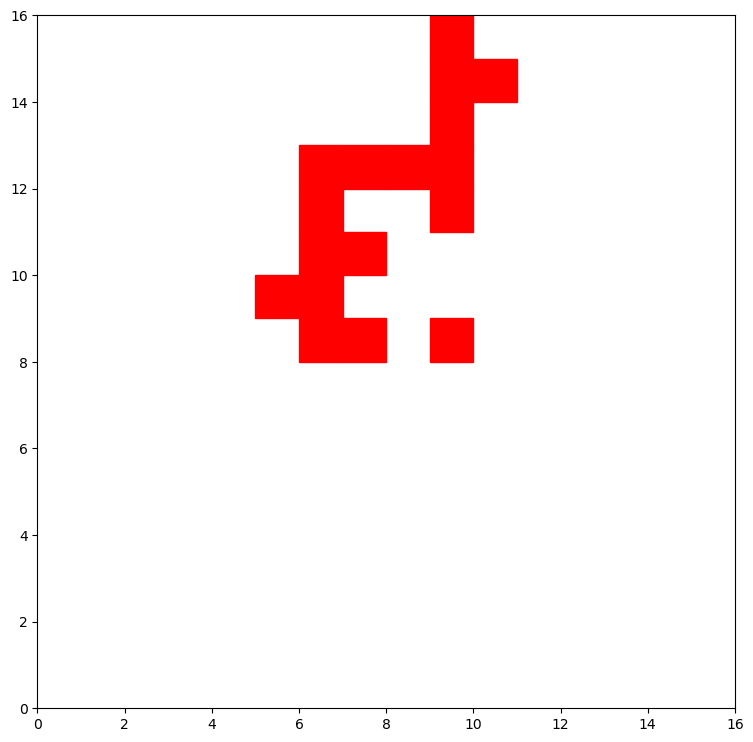

In [154]:
ncluster = np.array([s_a_xy(s, L) for s in cluster])

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(1,1,1)
for x, y in ncluster:
    rect = plt.Rectangle((x, y), 1, 1, color='r', edgecolor='k')
    ax.add_patch(rect)

plt.xlim(0, L)
plt.ylim(0, L)
plt.show()